In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
from matplotlib.axes import Axes
import xesmf as xe

In [24]:
data_dir = 'ocean_barotropic.res.nc'  # daily
ds_barotropic_i = xr.open_dataset(data_dir)

data_dir = 'ocean_temp_salt.res.nc'  # daily
ds_temp_salt = xr.open_dataset(data_dir)

data_dir = 'grid_spec.nc'  # daily
ds_grid_spec_720x410 = xr.open_dataset(data_dir)

data_dir = 'grid_spec_192_94_360_200.nc'  # daily
ds_grid_spec_360x200 = xr.open_dataset(data_dir)

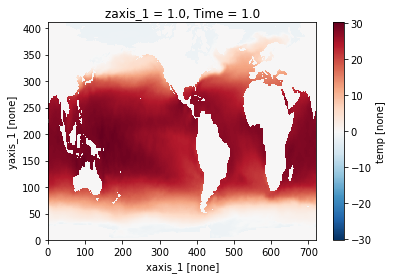

In [20]:
ds_temp_salt.temp.isel(zaxis_1=0).plot()

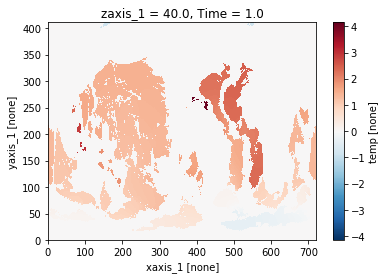

In [15]:
ds_temp_salt.temp.isel(zaxis_1=39).plot()

In [16]:
ds_barotropic_i

<xarray.Dataset>
Dimensions:         (Time: 1, xaxis_1: 360, yaxis_1: 200)
Coordinates:
  * xaxis_1         (xaxis_1) float64 1.0 2.0 3.0 4.0 ... 358.0 359.0 360.0
  * yaxis_1         (yaxis_1) float64 1.0 2.0 3.0 4.0 ... 198.0 199.0 200.0
  * Time            (Time) float64 1.0
Data variables:
    eta_t           (Time, yaxis_1, xaxis_1) float64 ...
    anompb          (Time, yaxis_1, xaxis_1) float64 ...
    conv_rho_ud_t   (Time, yaxis_1, xaxis_1) float64 ...
    eta_t_bar       (Time, yaxis_1, xaxis_1) float64 ...
    anompb_bar      (Time, yaxis_1, xaxis_1) float64 ...
    eta_u           (Time, yaxis_1, xaxis_1) float64 ...
    pbot_u          (Time, yaxis_1, xaxis_1) float64 ...
    patm_t          (Time, yaxis_1, xaxis_1) float64 ...
    udrho           (Time, yaxis_1, xaxis_1) float64 ...
    vdrho           (Time, yaxis_1, xaxis_1) float64 ...
    eta_nonbouss    (Time, yaxis_1, xaxis_1) float64 ...
    eta_nonsteric   (Time, yaxis_1, xaxis_1) float64 ...
    eta_steric      (

In [22]:
ds_temp_salt.temp

<xarray.DataArray 'temp' (Time: 1, zaxis_1: 40, yaxis_1: 410, xaxis_1: 720)>
[11808000 values with dtype=float64]
Coordinates:
  * xaxis_1  (xaxis_1) float32 1.0 2.0 3.0 4.0 5.0 ... 717.0 718.0 719.0 720.0
  * yaxis_1  (yaxis_1) float32 1.0 2.0 3.0 4.0 5.0 ... 407.0 408.0 409.0 410.0
  * zaxis_1  (zaxis_1) float32 1.0 2.0 3.0 4.0 5.0 ... 36.0 37.0 38.0 39.0 40.0
  * Time     (Time) float64 1.0
Attributes:
    long_name:  temp
    units:      none

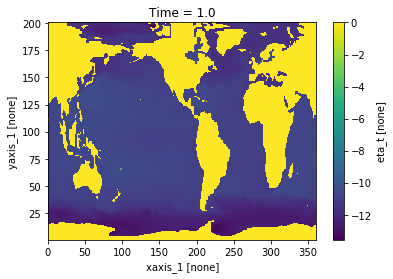

In [23]:
ds_barotropic_i.eta_t.plot()

In [31]:
ds_grid_spec_720x410.grid_y_T

<xarray.DataArray 'grid_y_T' (grid_y_T: 410)>
array([-80.75, -80.25, -79.75, ...,  88.75,  89.25,  89.75], dtype=float32)
Coordinates:
  * grid_y_T  (grid_y_T) float32 -80.75 -80.25 -79.75 ... 88.75 89.25 89.75
Attributes:
    long_name:       Nominal Latitude of T-cell center
    units:           degree_north
    cartesian_axis:  Y

In [35]:
ds_grid_spec_720x410.grid_x_T

<xarray.DataArray 'grid_x_T' (grid_x_T: 720)>
array([-279.75, -279.25, -278.75, ...,   78.75,   79.25,   79.75],
      dtype=float32)
Coordinates:
  * grid_x_T  (grid_x_T) float32 -279.75 -279.25 -278.75 ... 78.75 79.25 79.75
Attributes:
    long_name:       Nominal Longitude of T-cell center
    units:           degree_east
    cartesian_axis:  X

In [38]:
ds_grid_spec_360x200.gridlat_t

<xarray.DataArray 'gridlat_t' (gridlat_t: 200)>
array([-81.5     , -80.5     , -79.5     , -78.5     , -77.5     , -76.5     ,
       -75.5     , -74.5     , -73.5     , -72.5     , -71.5     , -70.5     ,
       -69.5     , -68.5     , -67.5     , -66.5     , -65.5     , -64.5     ,
       -63.5     , -62.5     , -61.5     , -60.5     , -59.5     , -58.5     ,
       -57.5     , -56.5     , -55.5     , -54.5     , -53.5     , -52.5     ,
       -51.5     , -50.5     , -49.5     , -48.5     , -47.5     , -46.5     ,
       -45.5     , -44.5     , -43.5     , -42.5     , -41.5     , -40.5     ,
       -39.5     , -38.5     , -37.5     , -36.5     , -35.5     , -34.5     ,
       -33.5     , -32.5     , -31.5     , -30.5     , -29.5     , -28.501427,
       -27.507105, -26.519793, -25.54212 , -24.576561, -23.625378, -22.690584,
       -21.773916, -20.876802, -20.000334, -19.145247, -18.311913, -17.500334,
       -16.710136, -15.940583, -15.190583, -14.458711, -13.743228, -13.042121,
    

In [39]:
ds_grid_spec_360x200.gridlon_t

<xarray.DataArray 'gridlon_t' (gridlon_t: 360)>
array([-279.5, -278.5, -277.5, ...,   77.5,   78.5,   79.5], dtype=float32)
Coordinates:
  * gridlon_t  (gridlon_t) float32 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
Attributes:
    long_name:  gridlon_t
    units:      degrees_E

In [42]:
ds_barotropic_i['xaxis_1'] = ds_grid_spec_360x200.gridlon_t.values
ds_barotropic_i['yaxis_1'] = ds_grid_spec_360x200.gridlat_t.values

In [43]:
ds_barotropic_i

<xarray.Dataset>
Dimensions:         (Time: 1, xaxis_1: 360, yaxis_1: 200)
Coordinates:
  * xaxis_1         (xaxis_1) float32 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yaxis_1         (yaxis_1) float32 -81.5 -80.5 -79.5 -78.5 ... 87.5 88.5 89.5
  * Time            (Time) float64 1.0
Data variables:
    eta_t           (Time, yaxis_1, xaxis_1) float64 ...
    anompb          (Time, yaxis_1, xaxis_1) float64 ...
    conv_rho_ud_t   (Time, yaxis_1, xaxis_1) float64 ...
    eta_t_bar       (Time, yaxis_1, xaxis_1) float64 ...
    anompb_bar      (Time, yaxis_1, xaxis_1) float64 ...
    eta_u           (Time, yaxis_1, xaxis_1) float64 ...
    pbot_u          (Time, yaxis_1, xaxis_1) float64 ...
    patm_t          (Time, yaxis_1, xaxis_1) float64 ...
    udrho           (Time, yaxis_1, xaxis_1) float64 ...
    vdrho           (Time, yaxis_1, xaxis_1) float64 ...
    eta_nonbouss    (Time, yaxis_1, xaxis_1) float64 ...
    eta_nonsteric   (Time, yaxis_1, xaxis_1) float64 ...
    eta_steric

In [53]:
# ds_out = xr.Dataset({'yaxis_1': (['yaxis_1'], ds_grid_spec_720x410.grid_y_T.values),
#                      'xaxis_1': (['xaxis_1'], ds_grid_spec_720x410.grid_x_T.values),
#                     }
#                    )

ds_out = xr.Dataset({'lat': (['lat'], ds_grid_spec_720x410.grid_y_T.values),
                     'lon': (['lon'], ds_grid_spec_720x410.grid_x_T.values),
                    }
                   )
ds_barotropic_i_ = ds_barotropic_i.rename({
  "yaxis_1": "lat",
  "xaxis_1": "lon"
})

In [54]:
regridder = xe.Regridder(ds_barotropic_i_, ds_out, 'bilinear')

Create weight file: bilinear_200x360_410x720.nc


In [55]:
regridder.clean_weight_file()

Remove file bilinear_200x360_410x720.nc


In [56]:
ds_barotropic_o = regridder(ds_barotropic_i_)

using dimensions ('lat', 'lon') from data variable eta_t as the horizontal dimensions for this dataset.


/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


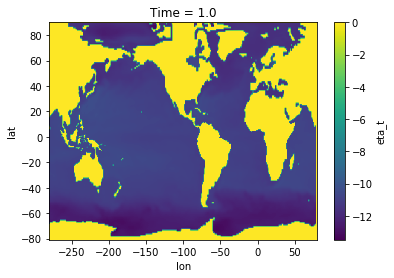

In [63]:
ds_barotropic_o.eta_t.plot()

In [61]:
ds_barotropic_o

<xarray.Dataset>
Dimensions:         (Time: 1, lat: 410, lon: 720)
Coordinates:
  * Time            (Time) float64 1.0
  * lon             (lon) float32 -279.75 -279.25 -278.75 ... 78.75 79.25 79.75
  * lat             (lat) float32 -80.75 -80.25 -79.75 ... 88.75 89.25 89.75
Data variables:
    eta_t           (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    anompb          (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    conv_rho_ud_t   (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    eta_t_bar       (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    anompb_bar      (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    eta_u           (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pbot_u          (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    patm_t          (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    udrho           (Time, lat, lon) float64 0.0 0.0 0.0 0.0

In [64]:
ds_barotropic_o_ = ds_barotropic_o.rename({
  "lat": "yaxis_1",
  "lon": "xaxis_1"
})

In [66]:
ds_barotropic_o_

<xarray.Dataset>
Dimensions:         (Time: 1, xaxis_1: 720, yaxis_1: 410)
Coordinates:
  * Time            (Time) float64 1.0
  * xaxis_1         (xaxis_1) float32 -279.75 -279.25 -278.75 ... 79.25 79.75
  * yaxis_1         (yaxis_1) float32 -80.75 -80.25 -79.75 ... 88.75 89.25 89.75
Data variables:
    eta_t           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    conv_rho_ud_t   (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_t_bar       (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb_bar      (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_u           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    pbot_u          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    patm_t          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    udrho           (Time, yaxis_1, xaxis_1) float

In [70]:
ds_barotropic_o_['xaxis_1'] =  ds_temp_salt.xaxis_1.values
ds_barotropic_o_['yaxis_1'] =  ds_temp_salt.yaxis_1.values

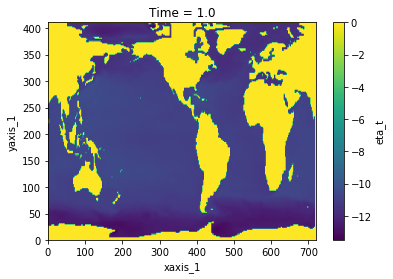

In [72]:
ds_barotropic_o_.eta_t.plot()

Now check for inconsistencies in this regridded ocean_barotropic.res.nc file and the original ocean_temp_salt.res.nc

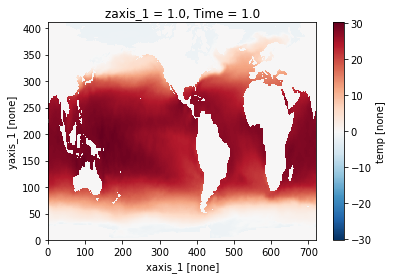

In [73]:
ds_temp_salt.temp.isel(zaxis_1=0).plot()

In [81]:
def count_mismatch(ds_temp_salt, ds_barotropic):
    count_lts_obaro = 0.0
    count_ots_lbaro = 0.0
    for i in range(ds_temp_salt.shape[2]):
        for j in range(ds_temp_salt.shape[3]):
            if (ds_temp_salt[0,0,i,j].values == 0.0) and (not ds_barotropic[0,i,j].values == 0.0):
                count_lts_obaro = count_lts_obaro + 1.0
            if (not ds_temp_salt[0,0,i,j].values == 0.0) and (ds_barotropic[0,i,j].values == 0.0):
                count_ots_lbaro = count_ots_lbaro + 1 
    return count_lts_obaro, count_ots_lbaro

In [82]:
count_lts_obaro, count_ots_lbaro = count_mismatch(ds_temp_salt.temp, ds_barotropic_o_.eta_t)

In [87]:
print(count_lts_obaro/(720*410)*100, count_ots_lbaro/(720*410)*100)

2.4058265582655824 0.9153116531165313


In [89]:
for ii in ds_barotropic_o_.data_vars:
    print(ds_barotropic_o_[ii].name)

eta_t
anompb
conv_rho_ud_t
eta_t_bar
anompb_bar
eta_u
pbot_u
patm_t
udrho
vdrho
eta_nonbouss
eta_nonsteric
eta_steric
eta_dynamic
eta_water
eta_source
eta_surf_temp
eta_surf_salt
eta_surf_water
eta_bott_temp
forcing_u_bt
forcing_v_bt


In [92]:
def fill_miss2d(ds, lat_i, lon_j):
# fist cycle
    cycle = 1

    while True:
        bl_i, bl_j = lat_i - cycle, lon_j - cycle
        tr_i, tr_j = lat_i + cycle, lon_j + cycle
        # Bottom left i
        if bl_i < 0:
            bl_i = 0
        # Bottom left j
        if bl_j < 0:
            bl_j = 0
        # Top right i
        if tr_i > ds.yaxis_1.shape[0]-1:
            tr_i = ds.yaxis_1.shape[0]-1
        # Top right j
        if tr_j > ds.xaxis_1.shape[0]-1:
            tr_j = ds.xaxis_1.shape[0]-1
        
        lats_i = np.arange(bl_i,tr_i)
        lons_j = np.arange(bl_j,tr_j)
        for lats_i_idx in lats_i:
            for lons_j_idx in lons_j:
                if ds[lats_i_idx, lons_j_idx]>0.0:
                    ds[lat_i, lon_j] = ds[lats_i_idx, lons_j_idx]
                    return
        cycle = cycle + 1

In [93]:
ds_barotropic_o_

<xarray.Dataset>
Dimensions:         (Time: 1, xaxis_1: 720, yaxis_1: 410)
Coordinates:
  * Time            (Time) float64 1.0
  * xaxis_1         (xaxis_1) float32 1.0 2.0 3.0 4.0 ... 718.0 719.0 720.0
  * yaxis_1         (yaxis_1) float32 1.0 2.0 3.0 4.0 ... 408.0 409.0 410.0
Data variables:
    eta_t           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    conv_rho_ud_t   (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_t_bar       (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb_bar      (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_u           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    pbot_u          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    patm_t          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    udrho           (Time, yaxis_1, xaxis_1) float64 0.0 

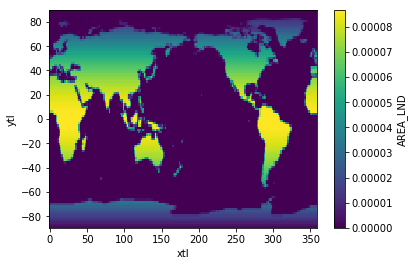

In [97]:
ds_grid_spec_720x410.AREA_LND.plot()

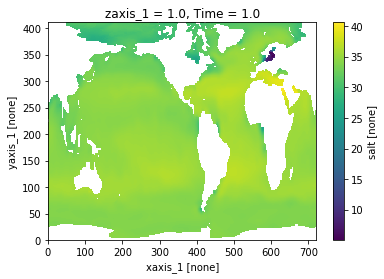

In [99]:
ds_temp_salt.salt.isel(zaxis_1=0).where(ds_temp_salt.salt.isel(zaxis_1=0) > 0.0).plot()

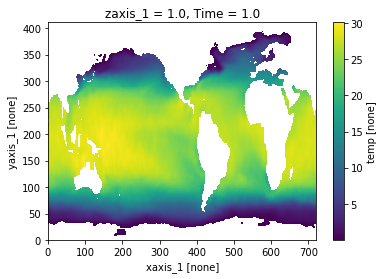

In [100]:
ds_temp_salt.temp.isel(zaxis_1=0).where(ds_temp_salt.temp.isel(zaxis_1=0) > 0.0).plot()

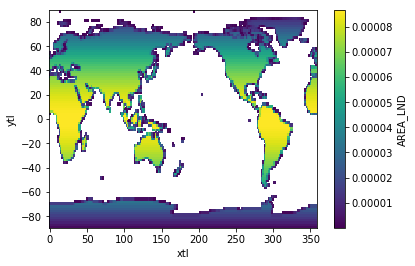

In [101]:
ds_grid_spec_720x410.AREA_LND.where(ds_grid_spec_720x410.AREA_LND > 0.0).plot()

In [ ]:
def count_mismatch(ds_temp_salt, ds_barotropic):
    count_lts_obaro = 0.0
    count_ots_lbaro = 0.0
    for i in range(ds_temp_salt.shape[2]):
        for j in range(ds_temp_salt.shape[3]):
            if (ds_temp_salt[0,0,i,j].values == 0.0) and (not ds_barotropic[0,i,j].values == 0.0):
                count_lts_obaro = count_lts_obaro + 1.0
            if (not ds_temp_salt[0,0,i,j].values == 0.0) and (ds_barotropic[0,i,j].values == 0.0):
                count_ots_lbaro = count_ots_lbaro + 1 
    return count_lts_obaro, count_ots_lbaro

In [104]:
ds_grid_spec_720x410.AREA_LND

<xarray.DataArray 'AREA_LND' (ytl: 94, xtl: 192)>
array([[2.163728e-06, 2.163728e-06, 2.163728e-06, ..., 2.163728e-06,
        2.163728e-06, 2.163728e-06],
       [5.034427e-06, 5.034427e-06, 5.034427e-06, ..., 5.034427e-06,
        5.034427e-06, 5.034427e-06],
       [7.903817e-06, 7.903817e-06, 7.903817e-06, ..., 7.903817e-06,
        7.903817e-06, 7.903817e-06],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])
Coordinates:
  * xtl      (xtl) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * ytl      (ytl) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54

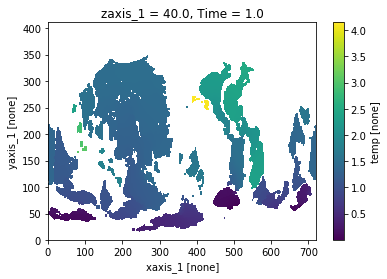

In [105]:
ds_temp_salt.temp.isel(zaxis_1=39).where(ds_temp_salt.temp.isel(zaxis_1=39) > 0.0).plot()

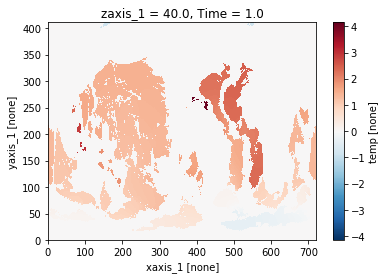

In [106]:
ds_temp_salt.temp.isel(zaxis_1=39).plot()

In [108]:
np.sum(np.isnan(ds_temp_salt.temp.isel(zaxis_1=39)))

<xarray.DataArray 'temp' ()>
array(0)
Coordinates:
    zaxis_1  float32 40.0

In [109]:
np.sum(np.isnan(ds_temp_salt.temp.isel(zaxis_1=0)))

<xarray.DataArray 'temp' ()>
array(0)
Coordinates:
    zaxis_1  float32 1.0

In [115]:
ds_barotropic_o_.xaxis_1.attrs['long_name'] = "xaxis_1" 
ds_barotropic_o_.xaxis_1.attrs['units'] = "none" 
ds_barotropic_o_.xaxis_1.attrs['cartesian_axis'] = "X" 

ds_barotropic_o_.yaxis_1.attrs['long_name'] = "yaxis_1" 
ds_barotropic_o_.yaxis_1.attrs['units'] = "none" 
ds_barotropic_o_.yaxis_1.attrs['cartesian_axis'] = "Y" 

ds_barotropic_o_.to_netcdf('ocean_barotropic.res.regrid.nc')

In [116]:
ds_barotropic_o_

<xarray.Dataset>
Dimensions:         (Time: 1, xaxis_1: 720, yaxis_1: 410)
Coordinates:
  * Time            (Time) float64 1.0
  * xaxis_1         (xaxis_1) float32 1.0 2.0 3.0 4.0 ... 718.0 719.0 720.0
  * yaxis_1         (yaxis_1) float32 1.0 2.0 3.0 4.0 ... 408.0 409.0 410.0
Data variables:
    eta_t           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    conv_rho_ud_t   (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_t_bar       (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anompb_bar      (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    eta_u           (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    pbot_u          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    patm_t          (Time, yaxis_1, xaxis_1) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    udrho           (Time, yaxis_1, xaxis_1) float64 0.0 